# Logistic regression

### 1. Load data and preprocessing
#### 1.1 Data overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 1.2 View the statistics of each feature

In [2]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 1.3 See the specific distribution of fraud categories

0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Frequency')

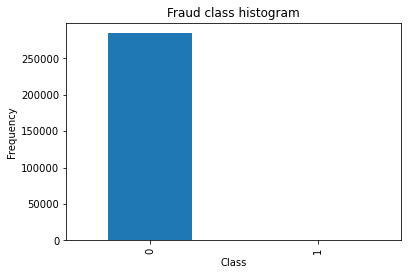

In [3]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
print (count_classes)
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

It can be seen that there is a large imbalance in the sample data, and the number of fraudulent users is significantly less than that of normal users. The imbalance of the samples has a great impact on the subsequent model evaluation effect, so two methods of down-sampling and up-sampling will be used to adjust the balance of the samples

#### 1.4 Feature normalization

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1)) 
data = data.drop(['Amount','Time'], axis=1)

* Read the data in creditcard.csv into data, because the Amount column in the data in creditcard.csv is special, other columns are in the range of (-1, 1), and the floating range of the two columns of Amount is compared , to know that the larger the floating range of the feature data, the greater the impact on the prediction results in the modeling process, but for this set of data, we do not have enough prior information to explain the importance of the feature data, so we To treat all feature data equally, let them all be between (-1,1). So we need to perform some preprocessing on the data. First, we need to normalize (standardize) the data in the Amount column through the StandardScaler module in sklearn.preprocessing. Then there is a column of Time in the data. This column of data is useless, that is to say, it is useless for credit card fraud prediction, so we have to delete it.
* Note: `data.drop(['Amount','Time'], axis=1)` will not change the data itself, so assign it to data. When I used it, I thought it would change the data itself like reverse() and sort().
* After the reshape in `data['Amount'].values.reshape(-1,1) (-1,1)` means to transform this array into the form of X*1

### 2: Downsampling
From the large number of samples, randomly select the same number of samples as the small number of samples, and finally form a sample set with the same number of positive and negative samples for training modeling.

In [5]:
X = data.iloc[:,data.columns != 'Class']
Y = data.iloc[:,data.columns == 'Class']

number_record_fraud = len(Y[Y.Class==1])

fraud_indices = np.array(data[data.Class == 1].index)
normal_indices = np.array(data[data.Class == 0].index)
random_normal_indices = np.array(np.random.choice(normal_indices,number_record_fraud,replace=False))

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data = data.iloc[under_sample_indices,:]

X_under_sample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
Y_under_sample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

from sklearn.model_selection import train_test_split

X_train_under_sample,X_test_under_sample,Y_train_under_sample,Y_test_under_sample = train_test_split(X_under_sample,Y_under_sample,test_size=0.3,random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

* Use `np.random.choice` to randomly select the number of negative samples (number_record_fraud) from the indices (normal_indices) of positive samples.

* `np.concatenate` merges negative samples and selected negative sample indices into

* Extract features `(X_under_sample)` and labels `(Y_under_sample)` from the original data according to the index obtained above

* The next step is to use `train_test_split` in the `sklearn.model_selection` module to divide the data `(features, labels)` extracted above into a training set and a test set, and the test accounts for 30% of the total. `X_train, X_test, Y_train, Y_test` are obtained by performing the same operation on the original unsampled data, which will be used later for testing.

In [6]:
print("normal sample ratio:",len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))
print("abnormal sample ratio:",len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))
print("total sample:",len(under_sample_data))

normal sample ratio: 0.5
abnormal sample ratio: 0.5
total sample: 984


### 3. Cross-validation

In machine learning, after the machine learning algorithm to be used is determined, the essence of model training is to determine a series of parameters (parameter tuning). Parameter tuning is actually a variety of tests, but there are rules to follow. First, use some data and a certain parameter to train a model, and then use some other data to bring in the model just trained, compare the output results with the labels, calculate an evaluation index, and judge the model based on this evaluation index. Whether the parameter entered is good or not.


* Recall value：
$$recall=\frac{TP}{TP+FN}$$
> $TP (True Positive)$ represents the number of correct predictions and positive cases, and $FN (False Negative)$ represents the number of wrong predictions and negative cases.

Cross-validation is to first divide the training data into n parts (note: it is divided into training samples, it has nothing to do with test samples), of which n-1 is used for training the model, and the remaining one is used for testing the model, and a recall value is obtained. N samples are traversed, each of which tests the model trained by the other n-1 samples, so that a total of n recall values are obtained, and the final recall value is obtained by averaging. This is cross-validation, which can greatly reduce the impact of those false values and outliers in the sample on model evaluation and parameter tuning.

* Regularization penalty term:
In order to prevent overfitting of the model, the weight parameters are required to be stable, so a penalty term is added after the target (loss) function.

* L2 Regularization：
$$loss+C∗\frac{1}{2^2}$$



* L1 Regularization：
$$loss+C∗|W|$$


> $C$ is the punishment intensity, so that in the process of training, the parameters will try to converge in the direction of floating and stable.



In [7]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(n_splits=5,shuffle=False)
    c_param_range = [0.01,0.1,1,10,100] 
    result_table = pd.DataFrame(index = range(len(c_param_range),2),columns=['C_parameter','Mean recall score'])
    result_table['C_parameter'] = c_param_range
    j = 0
    for c_param in c_param_range:
        print("==================")
        print('Regularization penalty：',c_param)
        print('==================')
        print()
        recall_accs = []
        for iteration,indices in enumerate(fold.split(x_train_data),start=1):
            Ir = LogisticRegression(C = c_param, penalty='l2',max_iter=10000)
            Ir.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_undersample = Ir.predict(x_train_data.iloc[indices[1],:].values)
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration',iteration,':Recal rate = ',recall_accs[-1])
        result_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print()
        print("Average recall:",np.mean(recall_accs))
        print()
    best_c = result_table.iloc[result_table['Mean recall score'].astype('float32').idxmax()]['C_parameter']            
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    print('Best parameter=',best_c)
    print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>")
    return best_c
best_c = printing_Kfold_scores(X_train_under_sample,Y_train_under_sample)


Regularization penalty： 0.01

Iteration 1 :Recal rate =  0.8356164383561644
Iteration 2 :Recal rate =  0.8493150684931506
Iteration 3 :Recal rate =  0.9152542372881356
Iteration 4 :Recal rate =  0.9324324324324325
Iteration 5 :Recal rate =  0.8787878787878788

Average recall: 0.8822812110715524

Regularization penalty： 0.1

Iteration 1 :Recal rate =  0.863013698630137
Iteration 2 :Recal rate =  0.8904109589041096
Iteration 3 :Recal rate =  0.9661016949152542
Iteration 4 :Recal rate =  0.9459459459459459
Iteration 5 :Recal rate =  0.9090909090909091

Average recall: 0.9149126414972711

Regularization penalty： 1

Iteration 1 :Recal rate =  0.8767123287671232
Iteration 2 :Recal rate =  0.9041095890410958
Iteration 3 :Recal rate =  0.9661016949152542
Iteration 4 :Recal rate =  0.9459459459459459
Iteration 5 :Recal rate =  0.9090909090909091

Average recall: 0.9203920935520656

Regularization penalty： 10

Iteration 1 :Recal rate =  0.8904109589041096
Iteration 2 :Recal rate =  0.90410958904

* The `KFload` function is used to generate the index set `fold` of the training and validation data during the cross-validation training process, where parameter 5 indicates that the ratio of the number of training and validation sets is 4:1. Fold is equivalent to 5 elements, and each element has two arrays, which are the indices of training and validation data (you can view them with` print iteration and indices in` the for loop).

* The `results_table` is the created `DataFrame object` to store the recall values obtained after cross-validation of different parameters.

* `enumerate` composes a traversable object (such as a list, string) into an index sequence to obtain the index and element value, `start=1 `means that the index starts from 1 (default is 0).

* The `LogisticRegression` function is used to create a logistic regression model, `penalty = 'l2'`, which means that the L2 regular penalty term is used.

The recall value to evaluate the model still has certain defects, and now the **confusion matrix** is introduced to further evaluate the model.

In [8]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Bring the test data obtained by downsampling into the model, and use the obtained prediction results and actual labels to draw a confusion matrix

Recall metric in the testing dataset:  0.9183673469387755


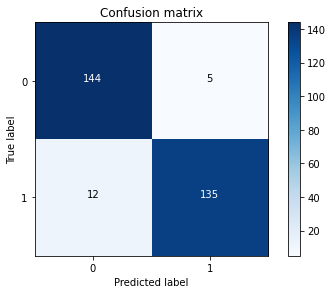

In [9]:
from sklearn.metrics import confusion_matrix
from itertools import product as product
lr = LogisticRegression(C = best_c, penalty = 'l2',max_iter=10000)
lr.fit(X_train_under_sample,Y_train_under_sample.values.ravel())
Y_pred_undersample = lr.predict(X_test_under_sample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test_under_sample,Y_pred_undersample)

np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

The relationship between Recall and confusion matrix is:

$$ Recall = \frac{144}{144+12}$$

It can be seen that recall is only related to $TP$ and $F$, then when the $FP$ is very large (originally 0, there is no fraud risk, but the prediction is 1, the prediction is a risk), so when adjusting parameters, not only the recall value, but also the Go through the confusion matrix and look at the value of $FP$.
The above is to use the test data obtained by downsampling to find the recall and confusion matrix, because the data obtained by downsampling is very small compared to the original data, so the test result is not convincing, so we use the original data (no downsampled data) for testing.

Recall metric in the testing dataset:  0.9387755102040817


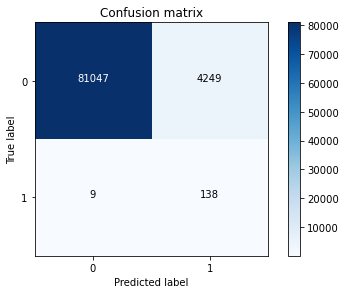

In [10]:
lr = LogisticRegression(C = best_c, penalty = 'l2',max_iter=10000)
lr.fit(X_train_under_sample,Y_train_under_sample.values.ravel())
Y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test,Y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

As can be seen from the above figure, the logistic regression model obtained by down-sampling processing data, although the recall value is quite high, but the $NP$ value is very high, that is, the manslaughter rate is very high

In the logistic regression model, in addition to the penalty parameter C, which needs to be adjusted, the Threshold can also be adjusted. By default, no processing is performed, which is equivalent to a Threshold of 0.5.

Recall metric in the testing dataset:  0.9863945578231292
Recall metric in the testing dataset:  0.9727891156462585
Recall metric in the testing dataset:  0.9387755102040817
Recall metric in the testing dataset:  0.9251700680272109
Recall metric in the testing dataset:  0.9183673469387755
Recall metric in the testing dataset:  0.9183673469387755
Recall metric in the testing dataset:  0.9183673469387755
Recall metric in the testing dataset:  0.9183673469387755
Recall metric in the testing dataset:  0.8843537414965986


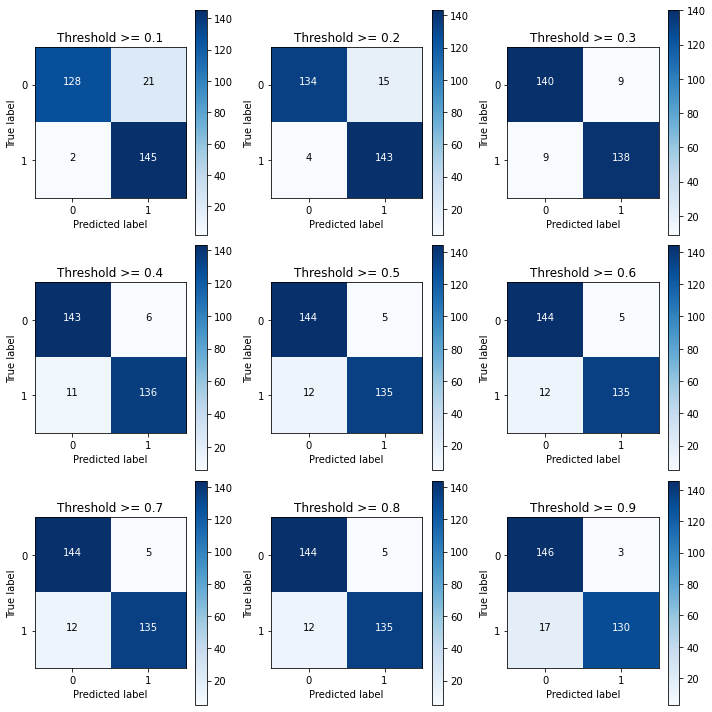

In [12]:
Ir = LogisticRegression(C=best_c,penalty='l2',max_iter=10000)
Ir.fit(X_train_under_sample,Y_train_under_sample.values.ravel())
y_pred_under_sample_proba = Ir.predict_proba(X_test_under_sample.values)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))
j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_under_sample_proba[:,1] > i
    plt.subplot(3,3,j)
    j+=1
    cnf_matrix = confusion_matrix(Y_test_under_sample,y_test_predictions_high_recall)      
    np.set_printoptions(precision=2)
    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix,
                         classes=class_names,
                         title="Threshold >= %s"%i)


When threshold = 0.5 the result is best.